## Installing packages

In [ ]:
# pip install tensorflow
# pip install matplotlib

## Imporing libraries

In [91]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, MaxPool2D , Flatten, Conv2D
from tensorflow.keras.activations import relu, linear, softmax
from sklearn.model_selection import train_test_split

## Path to dataset and print count of images

In [95]:
dataset_lib = pathlib.Path("D:/Projects/Python/science-project/dataset")
image_count = len(list(dataset_lib.glob("*/*.jpg")))
print(f"Images: {image_count}")

Images: 1655


## Images parametrs

In [108]:
batch_size = 32
img_width = 28
img_height = 28
img_channel = 3 # RGB - 3, color grayscale(black and white) - 1

## Create training and validation dataset

In [109]:
full_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_lib,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

x=[]
y=[]

for images, labels in full_ds:
    x.extend(images.numpy())
    y.extend(labels.numpy())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 20% images for testing, other for training

# Convert x,y to array
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# validation - for predict during training, test - for predict after training
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=42) # 10% for validation

# Convert from 0-255, to 0-1
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255
x_val_normalized = x_val / 255

print("x_train: ", x_train.shape)
print("x_text: ", x_test.shape)
print("x_val: ", x_val.shape)

Found 1655 files belonging to 6 classes.
x_train:  (1191, 28, 28, 3)
x_text:  (331, 28, 28, 3)
x_val:  (133, 28, 28, 3)


In [110]:
class_names = full_ds.class_names
num_classes = len(class_names)
print(f"Class names: {class_names}")

Class names: ['fresh_peaches_done', 'fresh_pomegranates_done', 'fresh_strawberries_done', 'rotten_peaches_done', 'rotten_pomegranates_done', 'rotten_strawberries_done']


## Creating model

In [115]:
model = Sequential()

model.add(Convolution2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (img_width,img_height,img_channel)))
model.add(Convolution2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Convolution2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Convolution2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 conv2d_61 (Conv2D)          (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_31 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_62 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_63 (Conv2D)          (None, 14, 14, 64)        36928     
                                                     

## Compiling model

In [112]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Training model

In [116]:
print()
print('Training start...')
print()

epochs = 30
history = model.fit(
    x_train_normalized,
    y_train,
    validation_data=(x_val_normalized, y_val),
    epochs=epochs
)


Training start...



RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

## Statistics

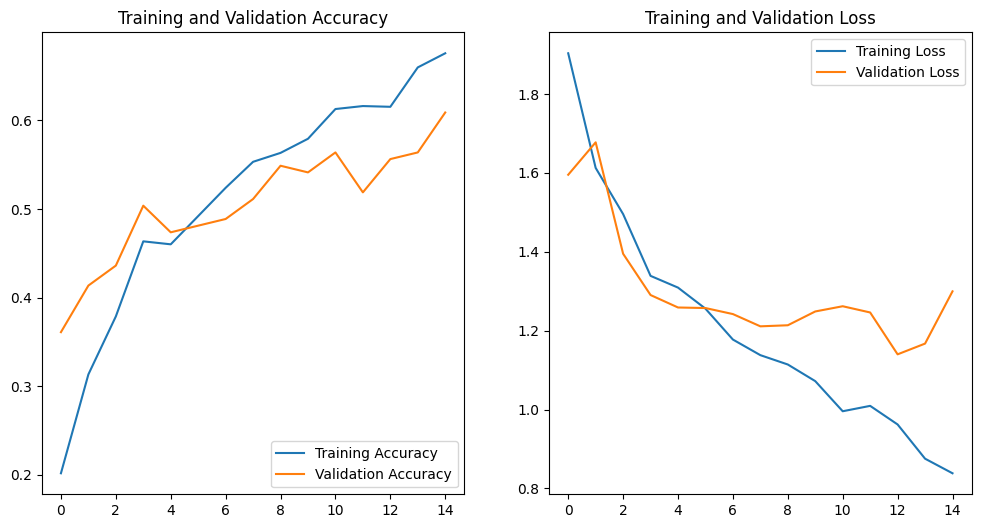

In [114]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

## Saving model

In [ ]:
print()
print('Training end!')
print('Saving model...')

#model.save('architecture.keras')

print('Model saved!')